In [2]:
#Import library
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#Load in the data
import_df = pd.read_csv('data/2019_League.csv')
import_df_2 = pd.read_csv('data/2019_League_2.csv')

In [4]:
#Merge the two datasets
df_unfitted = import_df[['Unnamed: 1','CF%','FF%','xGF']]
df_unfitted = df_unfitted.join(import_df_2[['PTS','GF','GA']])

In [5]:
#The * next to a teams name means they made the playoffs
#makes a new column if the team made the playoffs, drops the * then renames
df_unfitted['madePlayoffs'] = df_unfitted['Unnamed: 1'].map(lambda x: 1 if '*' in x else 0)
df_unfitted['team'] = df_unfitted['Unnamed: 1'].str.replace('*','',regex=True)
df = df_unfitted.drop(columns=['Unnamed: 1'])

In [6]:
df.head()

,CF%,FF%,xGF,PTS,GF,GA,madePlayoffs,team
0,51.6,51.3,185.1,128,319,221,1,Tampa Bay Lightning
1,53.9,53.1,184.0,107,289,223,1,Calgary Flames
2,53.1,53.6,169.7,107,257,212,1,Boston Bruins
3,49.0,49.0,162.4,104,274,248,1,Washington Capitals
4,47.8,48.3,175.1,103,223,191,1,New York Islanders


<function matplotlib.pyplot.xlabel(xlabel, fontdict=None, labelpad=None, *, loc=None, **kwargs)>

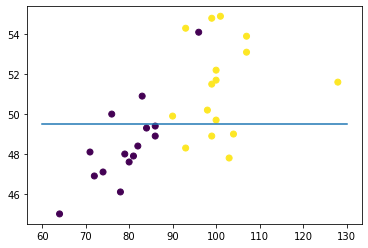

In [7]:
x_cor = [60,130]
y_cor = [49.5,49.5]
plt.scatter(x=df['PTS'],y=df['CF%'],c=df['madePlayoffs'])
plt.plot(x_cor,y_cor)
plt.xlabel

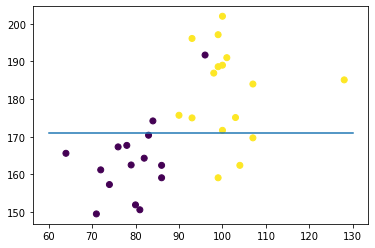

In [9]:
x_cor = [60,130]
y_cor = [171,171]
plt.scatter(x=df['PTS'],y=df['xGF'],c=df['madePlayoffs'])
plt.plot(x_cor,y_cor)
#plt.plot(x_cor,y_cor)

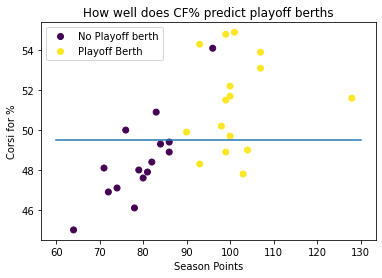

In [22]:
x_cor = [60,130]
y_cor = [49.5,49.5]
img = plt.scatter(x=df['PTS'],y=df['CF%'],c=df['madePlayoffs'])
plt.plot(x_cor,y_cor)
plt.xlabel('Season Points')
plt.ylabel('Corsi for %')
plt.title('How well does CF% predict playoff berths')
plt.legend(handles=img.legend_elements()[0],labels=['No Playoff berth','Playoff Berth'])
plt.savefig('data/CFvPlayoffs.jpeg',dpi=300)